<a href="https://colab.research.google.com/github/tricucdu/bai-tap-ai/blob/bai-tap-ann/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()

x_train = x_train.reshape((60000,28 *28)).astype('float32') / 255
x_test = x_test.reshape((10000,28 *28)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=40, batch_size=10,
    validation_data=(x_test, y_test)
)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
model.save("fashion_ann_model.h5")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step - accuracy: 0.7618 - loss: 0.6554 - val_accuracy: 0.8442 - val_loss: 0.4355
Epoch 2/40
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.8561 - loss: 0.3995 - val_accuracy: 0.8445 - val_loss: 0.4379
Epoch 3/40
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.8742 - loss: 0.3500 - val_accuracy: 0.8629 - val_loss: 0.3917
Epoch 4/40
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.8813 - loss: 0.3269 - val_accuracy: 0.8730 - val_loss: 0.3601
Epoch 5/40
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.8864 - loss: 0.3125 - val_accuracy: 0.8710 - val_loss: 0.3695
Epoch 6/40
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.8894 - loss: 0.3000 - val_accuracy: 0.8731 - val_loss: 0.3620
Epoch 7/40
6000/6000 ━━━━━

Test Accuracy: 88.43%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


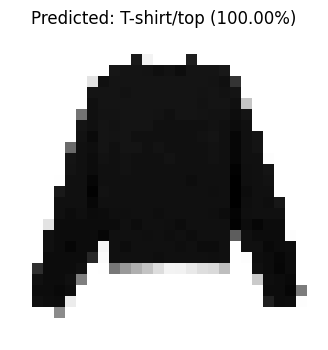

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


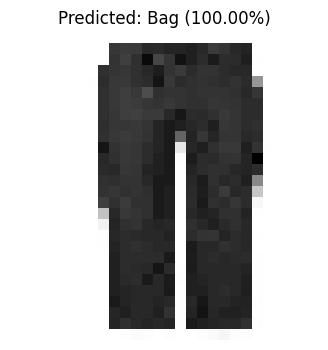

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


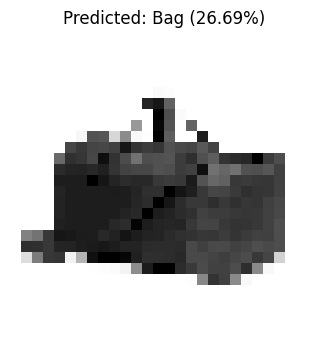

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


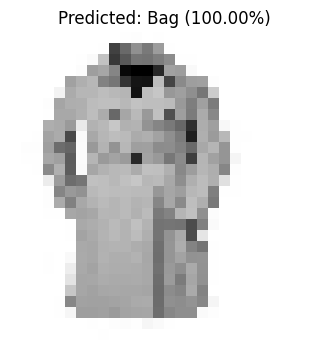

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


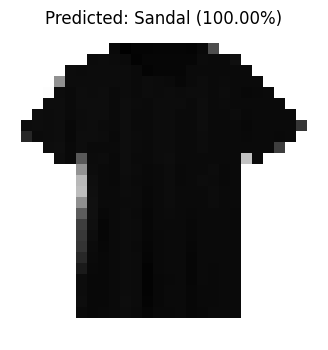

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


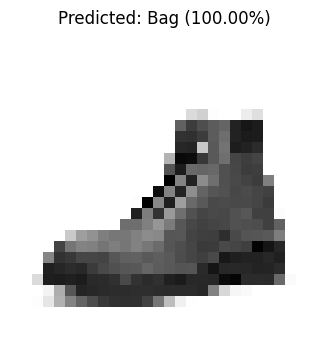

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


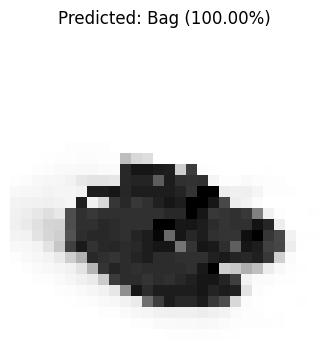

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


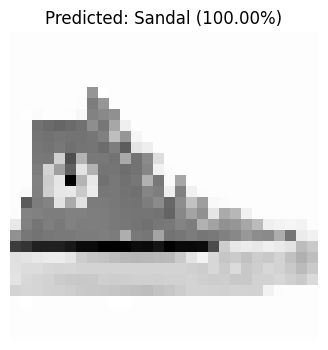

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model

# Load your trained Fashion MNIST model
model = load_model("/content/fashion_ann_model.h5")

# Class labels for Fashion MNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Predict a single image
def predict_image(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    img = cv2.resize(img, (28, 28))                     # Resize to 28x28
    img = img / 255.0                                   # Normalize
    img = img.reshape(1, 28, 28, 1)                     # Reshape for model
    img = img.reshape(1, 784)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions) * 100

    return class_labels[predicted_class], confidence

# Display the image and prediction
def display_prediction(image_path, model):
    predicted_label, confidence = predict_image(image_path, model)

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))

    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()

# === Predict Multiple Fashion MNIST-style Images ===
image_paths = [
    "/content/Screenshot 2025-03-22 132301.png",
    "/content/Screenshot 2025-03-22 132345.png",
    "/content/Screenshot 2025-03-22 132406.png",
    "/content/Screenshot 2025-03-22 132444.png",
    "/content/Screenshot 2025-03-22 132505.png",
    "/content/Screenshot 2025-03-22 132552.png",
    "/content/Screenshot 2025-03-22 133219.png",
    "/content/Screenshot 2025-03-23 155946.png",
]

for path in image_paths:
    display_prediction(path, model)
